In [1]:
!py -m pip install statsmodels

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 9.1/9.1 MB 41.5 kB/s eta 0:00:00
     ------------------------------------- 233.7/233.7 KB 74.9 kB/s eta 0:00:00


In [3]:
!py -m pip install textblob

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 636.8/636.8 KB 1.3 MB/s eta 0:00:00


In [5]:
!py -m pip install xgboost

     -------------------------------------- 125.4/125.4 MB 1.1 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
!py -m pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 186.5 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import nltk
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
import lightgbm

In [10]:
!py -m pip install pandas_datareader

     ------------------------------------ 109.5/109.5 KB 793.8 kB/s eta 0:00:00
     -------------------------------------- 62.8/62.8 KB 559.6 kB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 80.8 kB/s eta 0:00:00
     -------------------------------------- 61.2/61.2 KB 232.5 kB/s eta 0:00:00
     ------------------------------------- 160.2/160.2 KB 25.3 kB/s eta 0:00:00
     ------------------------------------- 139.2/139.2 KB 73.7 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

In [12]:
# Load the first dataset
columns=['Date','Category','News']
ndf = pd.read_csv("D:/TSF-Intern July 2022/datasets/india-news-headlines.csv",names=columns)

In [13]:
print('Showing part of the whole dataset:')
ndf.head(5)

Showing part of the whole dataset:


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [14]:
ndf.drop(0, inplace=True)
ndf.drop('Category', axis = 1, inplace=True)
print('Showing part of the whole dataset:')
ndf.head(-5)

Showing part of the whole dataset:


,Date,News
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic
...,...,...
3650961,20220331,Garment industry jittery over'GST hike'
3650962,20220331,AAP MLAs interfering in work: Councillors
3650963,20220331,Schools organise vax camps for kids
3650964,20220331,Madhya Pradesh CM Shivraj Singh Chouhan promis...


In [52]:
# Load the second dataset
hisdf = pd.read_csv("D:/TSF-Intern July 2022/datasets/^BSESN.csv")
hisdf.head(-5)

,Date,Open,High,Low,Close,Volume
0,14-Dec-15,24935.60,25194.15,24867.73,25150.35,11.99K
1,15-Dec-15,25186.68,25342.78,25075.54,25320.44,10.03K
2,16-Dec-15,25402.47,25572.90,25372.47,25494.37,11.12K
3,17-Dec-15,25596.63,25831.31,25448.32,25803.78,23.40K
4,18-Dec-15,25764.67,25789.51,25481.51,25519.22,10.73K
...,...,...,...,...,...,...
1223,20-Nov-20,43732.14,44013.02,43453.75,43882.25,17.80M
1224,23-Nov-20,44164.17,44271.15,43747.22,44077.15,17.94M
1225,24-Nov-20,44341.19,44601.63,44247.12,44523.02,19.15M
1226,25-Nov-20,44749.73,44825.37,43757.97,43828.10,14.61M


In [89]:
ndf.reset_index(drop=True, inplace=True)
hisdf.reset_index(drop=True, inplace=True)
df = pd.concat([ndf, hisdf], axis=1)

## Common Dataset Exploration:

In [90]:
# Check for common information of the first datast
ndf["Date"] = pd.to_datetime(ndf["Date"],format='%Y%m%d')
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          7717 non-null   datetime64[ns]
 1   News          7717 non-null   object        
 2   Subjectivity  7717 non-null   float64       
 3   Polarity      7717 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 241.3+ KB


In [91]:
# Group the headlines for each day
ndf['News'] = ndf.groupby(['Date']).transform(lambda x : ' '.join(x)) 
ndf = ndf.drop_duplicates() 
ndf.reset_index(inplace=True,drop=True)

In [92]:
ndf

,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.365123,0.034162
7713,2022-03-28,As fashion becomes democratic demand for styl...,0.383007,0.058513
7714,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144
7715,2022-03-30,I will not give in to trends Dossmode The tim...,0.344136,0.039954


In [93]:
# Check for any duplicated values
ndf.isnull().sum()

Date            0
News            0
Subjectivity    0
Polarity        0
dtype: int64

In [94]:
len(ndf)

7717

In [95]:
hisdf=hisdf[["Date","Open","High","Low","Close","Volume"]]
hisdf.head(-5)

,Date,Open,High,Low,Close,Volume
0,2015-12-14,24935.60,25194.15,24867.73,25150.35,11.99K
1,2015-12-15,25186.68,25342.78,25075.54,25320.44,10.03K
2,2015-12-16,25402.47,25572.90,25372.47,25494.37,11.12K
3,2015-12-17,25596.63,25831.31,25448.32,25803.78,23.40K
4,2015-12-18,25764.67,25789.51,25481.51,25519.22,10.73K
...,...,...,...,...,...,...
1223,2020-11-20,43732.14,44013.02,43453.75,43882.25,17.80M
1224,2020-11-23,44164.17,44271.15,43747.22,44077.15,17.94M
1225,2020-11-24,44341.19,44601.63,44247.12,44523.02,19.15M
1226,2020-11-25,44749.73,44825.37,43757.97,43828.10,14.61M


In [96]:
# Check for common information of the second dataset
hisdf["Date"]= pd.to_datetime(hisdf["Date"])
hisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1233 non-null   datetime64[ns]
 1   Open    1233 non-null   float64       
 2   High    1233 non-null   float64       
 3   Low     1233 non-null   float64       
 4   Close   1233 non-null   float64       
 5   Volume  1232 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 57.9+ KB


In [97]:
hisdf.describe()

,Open,High,Low,Close
count,1233.000000,1233.000000,1233.000000,1233.000000
mean,33586.203333,33743.589895,33351.454712,33540.882855
std,5108.498562,5117.777750,5075.231640,5094.562682
min,23060.390000,23142.960000,22494.610000,22951.830000
25%,28929.460000,29076.630000,28784.310000,28926.360000
50%,34167.530000,34351.340000,33949.460000,34142.150000
75%,37831.180000,38016.760000,37559.260000,37736.070000
max,44902.020000,45148.280000,44665.910000,45079.550000


In [98]:
# Check for duplicated values
hisdf.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    1
dtype: int64

In [99]:
len(hisdf)

1233

Text(0, 0.5, 'BSESN')

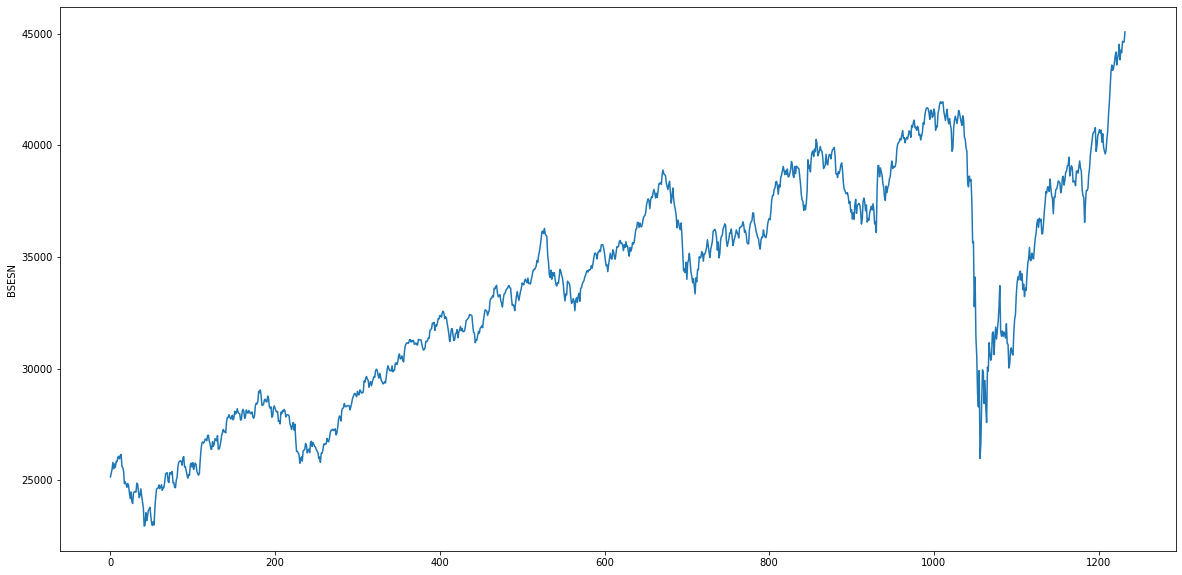

In [100]:
# Figure plot
plt.figure(figsize=(20,10))
hisdf['Close'].plot()
plt.ylabel('BSESN')

## Remove Unwanted Characters from the News :

In [101]:
#removing unwanted characters from the News
ndf.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
ndf["News"].head(5)

0    Status quo will not be disturbed at Ayodhya  s...
1    Powerless north India gropes in the dark Think...
2    The string that pulled Stephen Hawking to Indi...
3    Light combat craft takes India into club class...
4    Light combat craft takes India into club class...
Name: News, dtype: object

# Historical Analysis

## Plot the Moving Average:

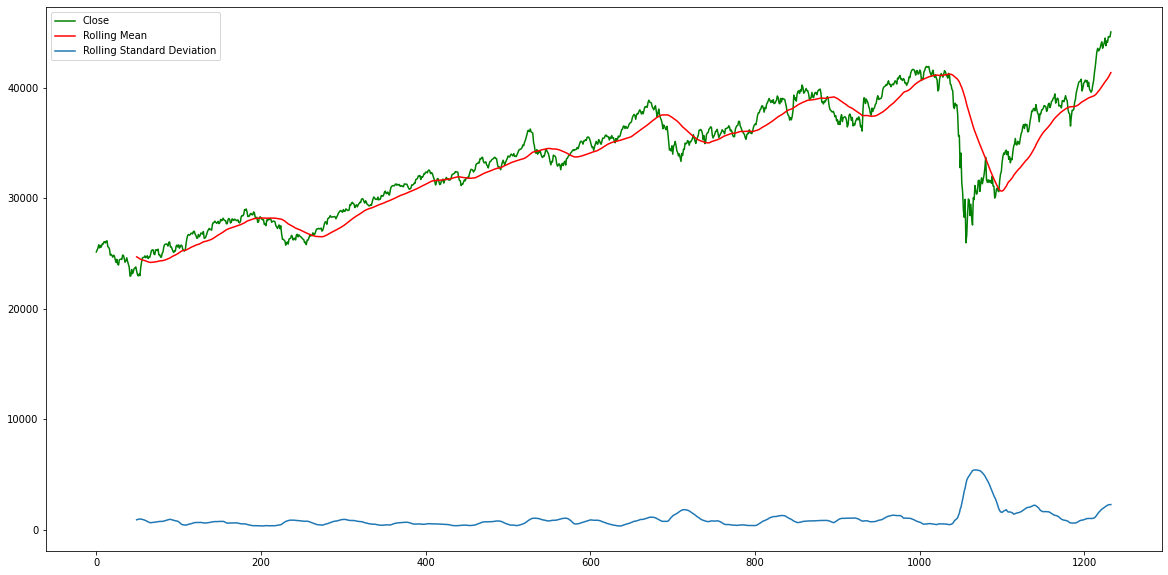

In [102]:
#Plotting moving average
close = hisdf['Close']

ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(20,10))
hisdf['Close'].plot(color='g',label='Close')
ma.plot(color = 'r',label='Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')

plt.legend()

## Plot the Returns:

Text(0.5, 1.0, 'Returns')

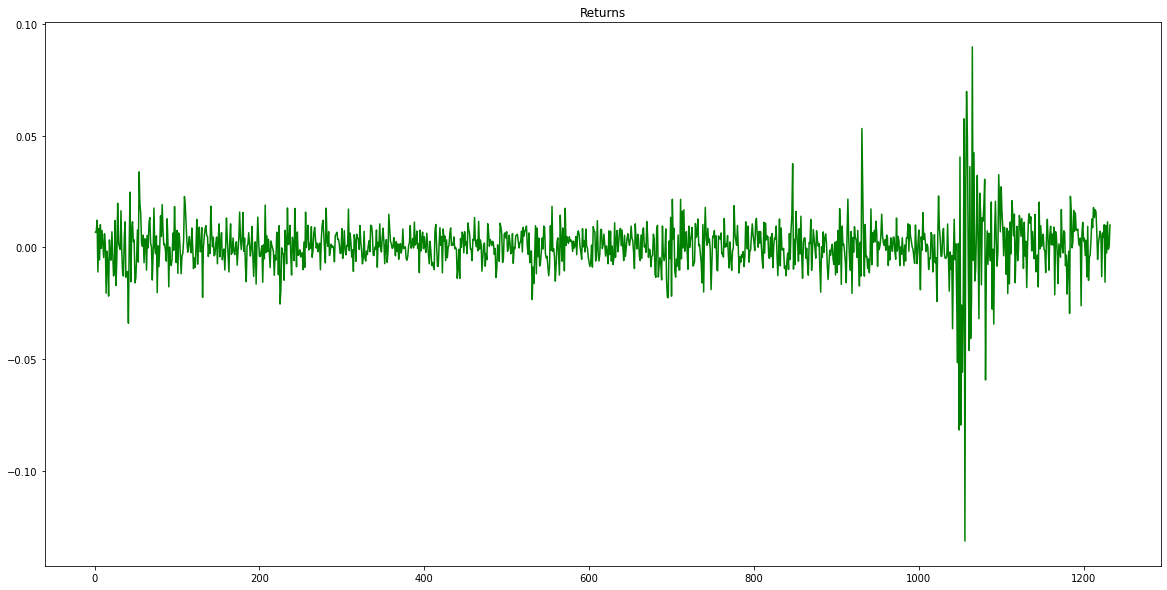

In [103]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (20,10))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [104]:
# Train test split
train = hisdf[:1219]
test = hisdf[1219:]

# Rolling Mean and Standard Deviation

In [105]:
from statsmodels.tsa.stattools import adfuller

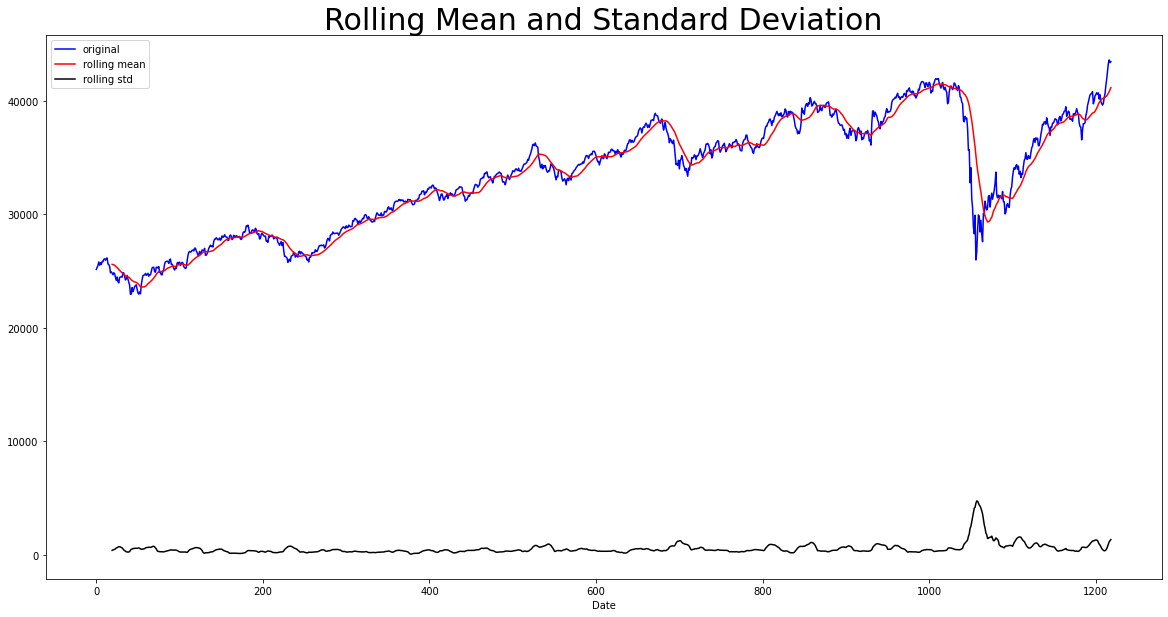

Results of dickey fuller test
ADF Test Statistic : -1.2467369806074056
p-value : 0.6531746792872049
#Lags Used : 11
Number of Observations Used : 1207
Weak evidence against null hypothesis, time series is non-stationary 


In [106]:
#Stationarity test
def test_stationarity(timeseries):

 #Determine the rolling statistics
 rolmean = timeseries.rolling(20).mean()
 rolstd = timeseries.rolling(20).std()

 #Plot rolling statistics:
 plt.figure(figsize = (20,10))
 plt.plot(timeseries, color = 'blue', label = 'original')
 plt.plot(rolmean, color = 'r', label = 'rolling mean')
 plt.plot(rolstd, color = 'black', label = 'rolling std')
 plt.xlabel('Date')
 plt.legend()
 plt.title('Rolling Mean and Standard Deviation',  fontsize = 30)
 plt.show(block = False)
 
 print('Results of dickey fuller test')
 result = adfuller(timeseries, autolag = 'AIC')
#  result = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
 labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 for value,label in zip(result, labels):
   print(label+' : '+str(value) )
 if result[1] <= 0.05:
   print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
 else:
   print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

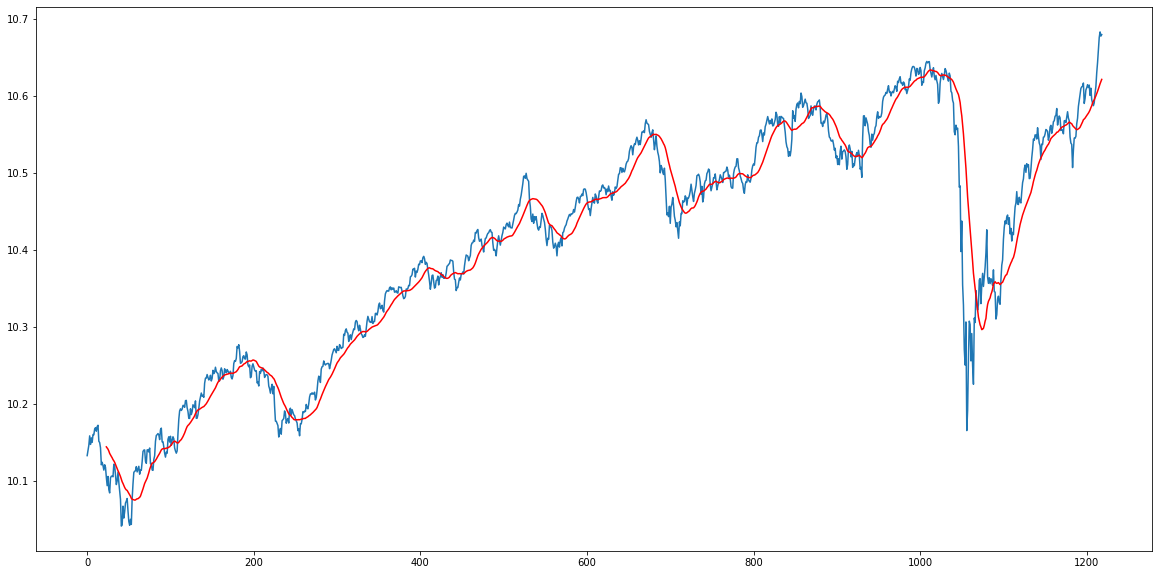

In [107]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (20,10))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

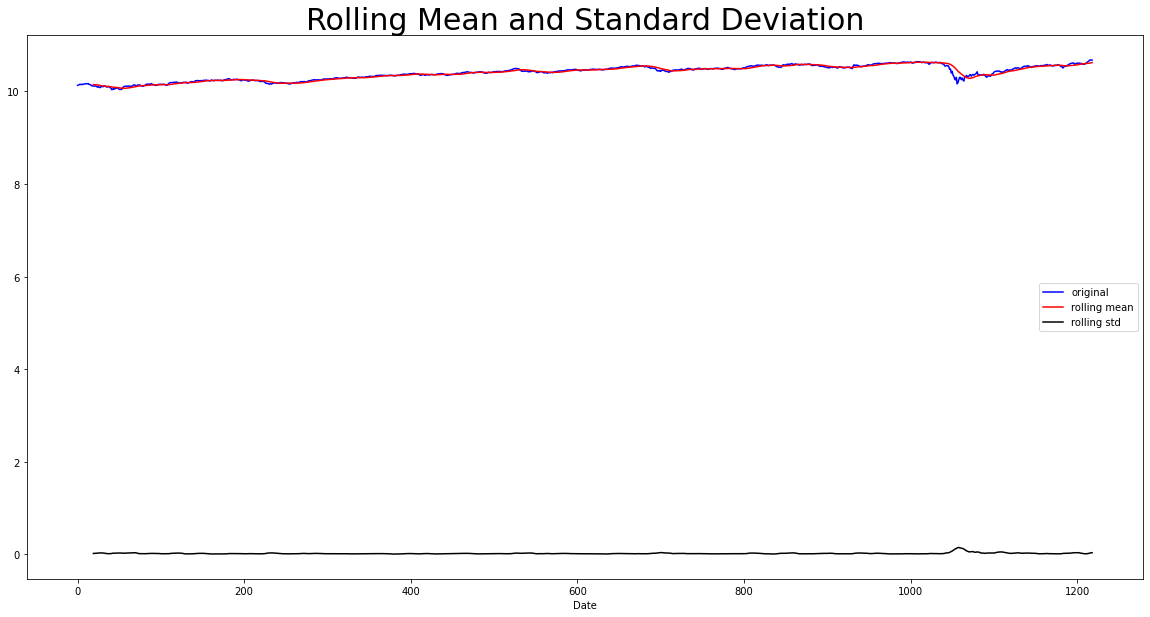

Results of dickey fuller test
ADF Test Statistic : -1.3627438493969781
p-value : 0.6000012057927064
#Lags Used : 12
Number of Observations Used : 1206
Weak evidence against null hypothesis, time series is non-stationary 


In [108]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

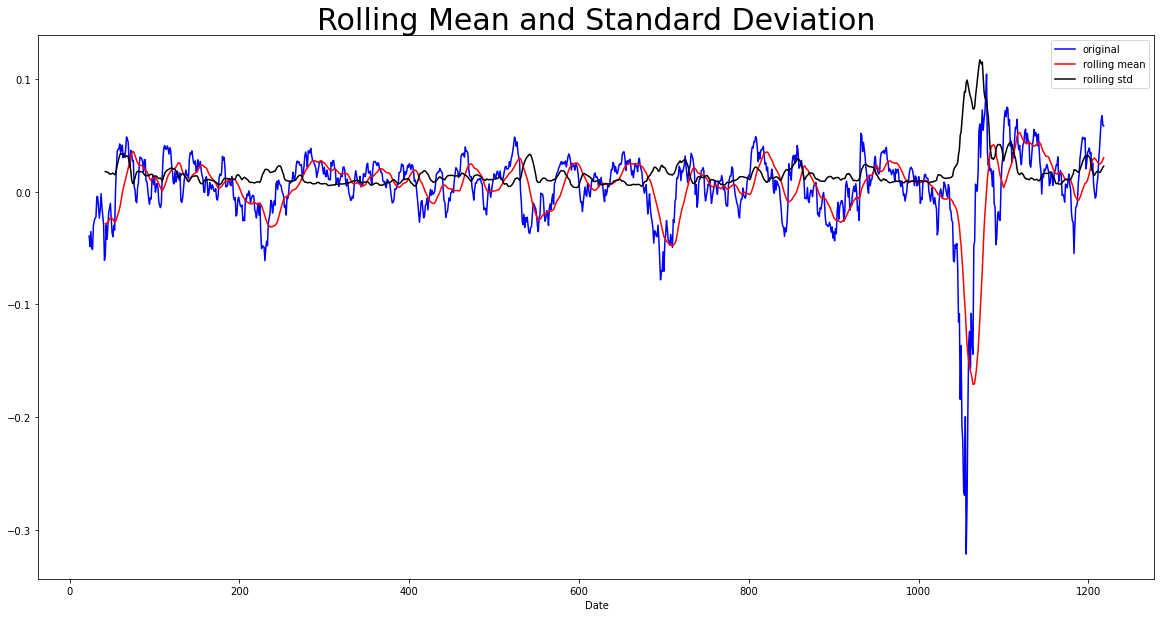

Results of dickey fuller test
ADF Test Statistic : -7.122462222799777
p-value : 3.692161819709969e-10
#Lags Used : 12
Number of Observations Used : 1183
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [109]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [82]:
!py -m pip install pmdarima

     ------------------------------------ 603.1/603.1 KB 324.3 kB/s eta 0:00:00
     ------------------------------------ 985.1/985.1 KB 770.1 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [110]:
#Using auto arima to make predictions using log data
from pmdarima import auto_arima

In [111]:
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7376.743, Time=2.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7384.452, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7386.921, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7386.512, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7384.648, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-7386.910, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7385.596, Time=0.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7385.056, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-7386.892, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 3.974 seconds


ValueError: Shape of passed values is (10, 1), indices imply (14, 1)

Text(0, 0.5, 'Actual Stock Price')

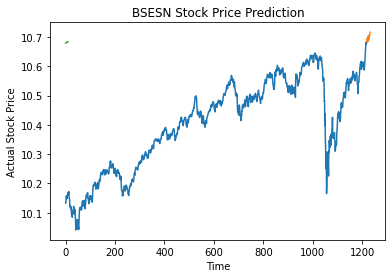

In [85]:
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

# Error Calculation

In [86]:
#Calculating error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

ValueError: Found input variables with inconsistent numbers of samples: [14, 10]

# Textual Analysis

In [87]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [88]:
#Adding subjectivity and polarity columns
ndf['Subjectivity'] = ndf['News'].apply(getSubjectivity)
ndf['Polarity'] = ndf['News'].apply(getPolarity)
ndf

,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039
3,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7712,2022-03-27,Playing a dead man in Body God meant sitting i...,0.365123,0.034162
7713,2022-03-28,As fashion becomes democratic demand for styl...,0.383007,0.058513
7714,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.403627,0.092144
7715,2022-03-30,I will not give in to trends Dossmode The tim...,0.344136,0.039954


In [ ]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

In [ ]:
ndf['Compound'] = [sia.polarity_scores(v)['compound'] for v in ndf['News']]
ndf['Negative'] = [sia.polarity_scores(v)['neg'] for v in ndf['News']]
ndf['Neutral'] = [sia.polarity_scores(v)['neu'] for v in ndf['News']]
ndf['Positive'] = [sia.polarity_scores(v)['pos'] for v in ndf['News']]
ndf

## Merge the Historical and Textual Data

In [ ]:
df_merge = pd.merge(hisdf, ndf, how='inner', on='Date')
df_merge

## Create Dataset for Model Training

In [ ]:
dfmerge1 = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
dfmerge1

# Normalize Data

In [ ]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(dfmerge1))
df.columns = dfmerge1.columns
df.index = dfmerge1.index
df.head()

In [ ]:
X=df.drop('Close',axis=1)
X

In [ ]:
Y=df['Close']
Y

# Split the Dataset into Train & Test Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
x_train.shape

In [ ]:
x_train[:10]

## RandomForestRegressor Model

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [ ]:
print(prediction[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(prediction,y_test))

## DecisionTreeRegressor Model

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)

In [ ]:
print(predictions[:10])
print(y_test[:10])
print('Mean Squared error: ',mean_squared_error(predictions,y_test))

## AdaBoostRegressor Model

In [ ]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)

In [ ]:
predictions = adb.predict(x_test)
print(mean_squared_error(predictions, y_test))

## LGBMRegressor Model

In [ ]:
gbm = lightgbm.LGBMRegressor()
gbm.fit(x_train, y_train)

In [ ]:
predictions = gbm.predict(x_test)
print(mean_squared_error(predictions, y_test))

## XGBRegressor Model

In [ ]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

In [ ]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions, y_test))

# Conclusion